In [2]:
#네이버 사이트로부터 데이터 추출 코드

import requests
import datetime
import csv
import os
from bs4 import BeautifulSoup

def news_Finder(search_Sentence,start,end,file_Name):
    
    '''
    (str,datetime.date,datetime.date(or datetime.datetime),str) ---> str
    This function shows the number of news of particular date from start to end.
    
    '''
    
    #end에서 하루를 더 더해 반복문에서 원래 now 일자까지의 기사 개수가 나오도록 조정함.
    end += datetime.timedelta(days=1)

    #20XX.XX.XX로 형태를 조정하는 이유: naver에서 리퀘스트 할때 이 형태여야 하기 때문이다.
    end_Date = end.strftime('%Y.%m.%d')

    #기사 개수를 보길 원하는 시작 날짜을 20XX.XX.XX 형태로 나타냄.
    start_Date = start.strftime('%Y.%m.%d')
    
    #파일 디렉토리 변수를 지정
    file_Directory = 'Data/Naver/'+file_Name + '.csv'
    
    if os.path.exists(file_Directory) == True:
        print('This file directory already exists')
        raise NotImplementedError
        
    else:
    
    #엑셀 차트로 표현하기 위해서 csv 모듈 이용해서 파일 작성
        file = open(file_Directory,'a', encoding='euc-kr',newline='')
        csvWriter = csv.writer(file)
        csvWriter.writerow(['검색어','검색 날짜','뉴스 개수'])


        while start_Date != end_Date:

            #어떤 날짜인지 표시
            print(start_Date)

            #네이버에 리퀘스트를 요청할 날짜를 search_Date로 설정함.
            search_Date = start_Date


            #네이버에서 특정 일자의 특정 단어가 들어간 기사의 개수를 찾기 위한 URL 양식
            address = 'https://search.naver.com/search.naver?where=news' + '&query={}&pd=3&ds={}&de={}'.format(search_Sentence,search_Date,search_Date)

            print(address)

            # HTTP GET Request

            req = requests.get(address)


            #html 소스 가져오기
            html = req.text

            # BeautifulSoup으로 html소스를 python객체로 변환하기
            # 첫 인자는 html소스코드, 두 번째 인자는 어떤 parser를 이용할지 명시.

            all_news_information = BeautifulSoup(html, 'html.parser')

            #Copy selecter에 의해 복사된 태그 사이에 들어가는 정보만 가져옴, 여기서는 뉴스 개수만 가져오기 위함임.
            news_number_info = all_news_information.select('#main_pack > div.news.mynews.section._prs_nws > div.section_head > div.title_desc.all_my > span')


            #뉴스 개수가 존재하지 않아 태그에 해당하는 정보가 존재하지 않을 때 0건으로 저장
            if not news_number_info:

                csvWriter.writerow([search_Sentence,search_Date,'0'])


            #데이터들 중에서 온전히 뉴스 개수만 가져오기 위한 과정
            else:
                only_news_number = ((((str(news_number_info[0])).split(' / '))[1]).split('<'))[0]
                only_news_number = only_news_number.replace('건','').replace(',','')

                csvWriter.writerow([search_Sentence,search_Date,only_news_number])


            # 한 과정이 끝날때마다 다음 날짜 뉴스로 넘어가기 위함
            start = start + datetime.timedelta(days=1)
            start_Date = start.strftime('%Y.%m.%d')

In [ ]:
#장자연, 버닝썬에 대한 네이버 사이트로부터의 데이터 추출

%matplotlib inline
from matplotlib import pyplot as plt
import csv
A_News = []
B_News = []
Trend_1 = input()
Trend_2 = input()



start = datetime.date(2019,1,20)

end = datetime.date(2019,5,1)

search_Sentences = ['장자연','버닝썬']

for search_Sentence in search_Sentences:
    
    file_Name = search_Sentence + '_Naver' + '(' + str(start.strftime('%Y.%m.%d')) + '~' + str(end.strftime('%Y.%m.%d')) + ')' 
    
    news_Finder(search_Sentence,start,end,file_Name)
    

for search_Sentence in search_Sentences:
    
    file_Name = search_Sentence + '_Naver' + '(' + str(start.strftime('%Y.%m.%d')) + '~' + str(end.strftime('%Y.%m.%d')) + ')' 
    
    file_Directory = 'Data/Naver/'+file_Name + '.csv'
    
    file = open(file_Directory,'r', encoding='euc-kr',newline='')
    
    csvReader = csv.reader(file)

    
    
    for line in csvReader:
        
    
        if line[0] != '검색어':
             
                
            if search_Sentence == search_Sentences[0]:

                A_News.append(int(line[2]))
                
            
            if search_Sentence == search_Sentences[1]:
           
                B_News.append(int(line[2]))
    
            
xs = list(range(1,len(A_News) + 1))

            
Graph_title = "The trend of news about '{}' and '{}'".format(Trend_1,Trend_2) + '(' +  start.strftime('%Y.%m.%d') + '~' + end.strftime('%Y.%m.%d') + ')' 
plt.figure(figsize=(30, 3))          
plt.plot(xs, A_News, 'r-', label="The number of news about" + Trend_1)
plt.plot(xs, B_News, 'g-', label="The number of news about" + Trend_2)

plt.legend(loc=2)



plt.title(Graph_title) 
plt.xlabel('Day_delta from start_date')
plt.ylabel('The number of news')
plt.show()
         
file.close()

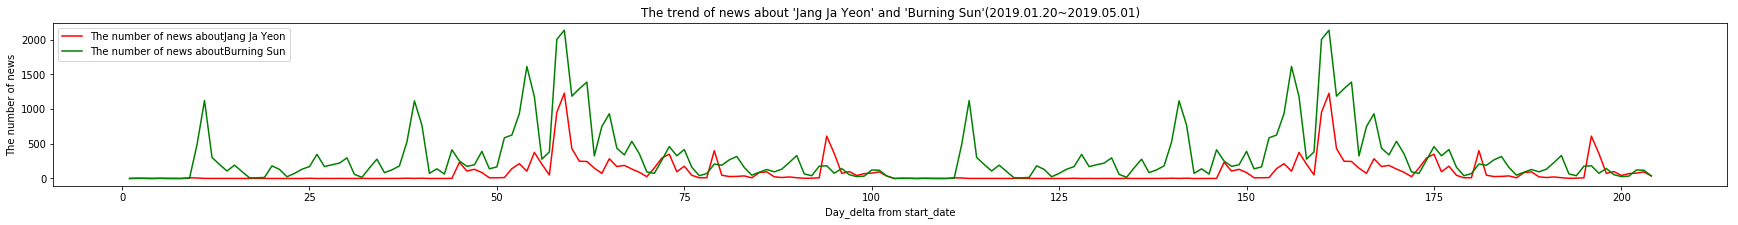

In [3]:
#이미 추출된 데이터를 통한 그래프 작성 코드

for search_Sentence in search_Sentences:
    
    file_Name = search_Sentence + '_Naver' + '(' + str(start.strftime('%Y.%m.%d')) + '~' + str(end.strftime('%Y.%m.%d')) + ')' 
    
    file_Directory = 'Data/Naver/'+file_Name + '.csv'
    
    file = open(file_Directory,'r', encoding='euc-kr',newline='')
    
    csvReader = csv.reader(file)

    
    
    for line in csvReader:
        
    
        if line[0] != '검색어':
             
                
            if search_Sentence == search_Sentences[0]:

                A_News.append(int(line[2]))
                
            
            if search_Sentence == search_Sentences[1]:
           
                B_News.append(int(line[2]))
    
            
xs = list(range(1,len(A_News) + 1))

            
Graph_title = "The trend of news about '{}' and '{}'".format(Trend_1,Trend_2) + '(' +  start.strftime('%Y.%m.%d') + '~' + end.strftime('%Y.%m.%d') + ')' 
plt.figure(figsize=(30, 3))          
plt.plot(xs, A_News, 'r-', label="The number of news about " + Trend_1)
plt.plot(xs, B_News, 'g-', label="The number of news about " + Trend_2)

plt.legend(loc=2)



plt.title(Graph_title) 
plt.xlabel('Day_delta from start_date')
plt.ylabel('The number of news')
plt.show()
         
file.close()

Oe Jil Hye
Gamst
2019.06.05
https://search.naver.com/search.naver?where=news&query=외질혜&pd=3&ds=2019.06.05&de=2019.06.05
2019.06.06
https://search.naver.com/search.naver?where=news&query=외질혜&pd=3&ds=2019.06.06&de=2019.06.06
2019.06.07
https://search.naver.com/search.naver?where=news&query=외질혜&pd=3&ds=2019.06.07&de=2019.06.07
2019.06.08
https://search.naver.com/search.naver?where=news&query=외질혜&pd=3&ds=2019.06.08&de=2019.06.08
2019.06.09
https://search.naver.com/search.naver?where=news&query=외질혜&pd=3&ds=2019.06.09&de=2019.06.09
2019.06.10
https://search.naver.com/search.naver?where=news&query=외질혜&pd=3&ds=2019.06.10&de=2019.06.10
2019.06.11
https://search.naver.com/search.naver?where=news&query=외질혜&pd=3&ds=2019.06.11&de=2019.06.11
2019.06.12
https://search.naver.com/search.naver?where=news&query=외질혜&pd=3&ds=2019.06.12&de=2019.06.12
2019.06.13
https://search.naver.com/search.naver?where=news&query=외질혜&pd=3&ds=2019.06.13&de=2019.06.13
2019.06.14
https://search.naver.com/search.naver?where=n

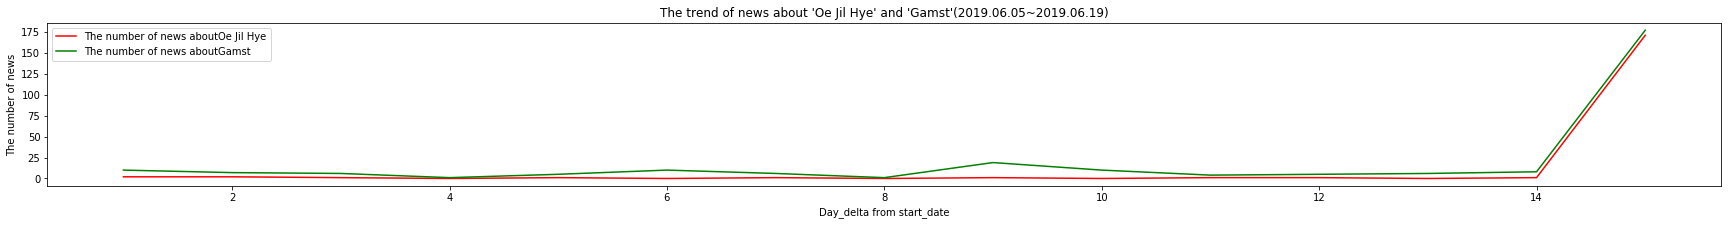

In [4]:
#두 코드를 이용한 외질혜- 감스트의 검색어 추이 그래프 작성

%matplotlib inline
from matplotlib import pyplot as plt
import csv
A_News = []
B_News = []
Trend_1 = input()
Trend_2 = input()


start = datetime.date(2019,6,5)

end = datetime.datetime.now()

search_Sentences = ['외질혜','감스트']

for search_Sentence in search_Sentences:
    
    file_Name = search_Sentence + '_Naver' + '(' + str(start.strftime('%Y.%m.%d')) + '~' + str(end.strftime('%Y.%m.%d')) + ')' 
    
    news_Finder(search_Sentence,start,end,file_Name)
    

    
for search_Sentence in search_Sentences:
    
    file_Name = search_Sentence + '_Naver' + '(' + str(start.strftime('%Y.%m.%d')) + '~' + str(end.strftime('%Y.%m.%d')) + ')' 
    
    file_Directory = 'Data/Naver/'+file_Name + '.csv'
    
    file = open(file_Directory,'r', encoding='euc-kr',newline='')
    
    csvReader = csv.reader(file)

    
    
    for line in csvReader:
        
    
        if line[0] != '검색어':
             
                
            if search_Sentence == search_Sentences[0]:

                A_News.append(int(line[2]))
                
            
            if search_Sentence == search_Sentences[1]:
           
                B_News.append(int(line[2]))
    
            
xs = list(range(1,len(A_News) + 1))

            
Graph_title = "The trend of news about '{}' and '{}'".format(Trend_1,Trend_2) + '(' +  start.strftime('%Y.%m.%d') + '~' + end.strftime('%Y.%m.%d') + ')' 
plt.figure(figsize=(30, 3))          
plt.plot(xs, A_News, 'r-', label="The number of news about" + Trend_1)
plt.plot(xs, B_News, 'g-', label="The number of news about" + Trend_2)

plt.legend(loc=2)



plt.title(Graph_title) 
plt.xlabel('Day_delta from start_date')
plt.ylabel('The number of news')
plt.show()
         
file.close()